Starting with TensorFlow Datasets -part 3; An end to end example for building a Flower Classifier

https://kvirajdatt.medium.com/starting-with-tensorflow-datasets-part-3-an-end-to-end-example-for-building-a-flowerclassifier-1b7c371447e1

In [1]:
import numpy as np
import keras
from keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import logging, os

logging.basicConfig(level=logging.INFO)
# logging.basicConfig(level=logging.DEBUG)

BASE_PATH = "../../../../../local_data/practice/tfds/kohir/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"part3"
os.system("mkdir -p " + OUTPUT_PATH)

print(BASE_PATH)
print(DATA_PATH)
print(OUTPUT_PATH)

2025-07-07 21:43:11.032669: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-07 21:43:11.032704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-07 21:43:11.033534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-07 21:43:11.039335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


../../../../../local_data/practice/tfds/kohir/
../../../../../local_data/tfds/
../../../../../local_data/practice/tfds/kohir/part3


In [2]:
# tfds.disable_progress_bar()


#trainset, validationset, test-set, metadata
(train_ds, val_ds, test_ds), metadata = tfds.load('tf_flowers',
                data_dir=DATA_PATH,
                split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                with_info=True,
                as_supervised=True,
        )
print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of validation samples: {val_ds.cardinality()}")
print(f"Number of test samples: {test_ds.cardinality()}")

INFO:absl:Generating dataset tf_flowers (../../../../../local_data/tfds/tf_flowers/3.0.1)


2025-07-07 21:43:22.620414: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "ABORTED: All 10 retry attempts failed. The last failure: Error executing an HTTP request: HTTP response code 308".
INFO:absl:Dataset tf_flowers is hosted on GCS. It will automatically be downloaded to your
local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

INFO:absl:Load dataset info from ../../../../../local_data/tfds/tf_flowers/3.0.1.incomplete20JX9G
INFO:absl:Fields info.[splits, supervised_keys, module_name, file_format] from disk and from code do not match. Keeping the one from code.
2025-07-07 21:43:27.192388: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-07 21:43:27.192970: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-07 21:43:27.258987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:90

Dataset tf_flowers downloaded and prepared to ../../../../../local_data/tfds/tf_flowers/3.0.1. Subsequent calls will reuse this data.


L355
2025-07-07 21:43:27.259536: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-07 21:43:27.259747: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-07 21:43:27.393678: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#

Number of training samples: 2936
Number of validation samples: 367
Number of test samples: 367


2025-07-07 21:43:27.853293: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-07-07 21:43:27.913983: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


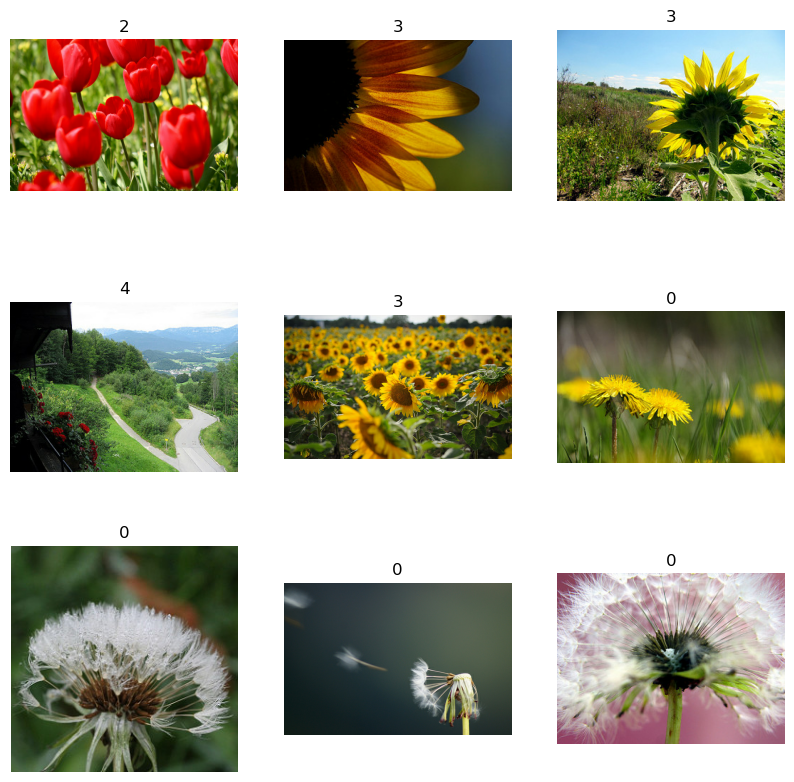

In [3]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    plt.imshow(images[0])
    # plt.title(metadata.features['label'].int2str(labels[0]))
    plt.axis("off")

2025-07-07 21:43:30.497927: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


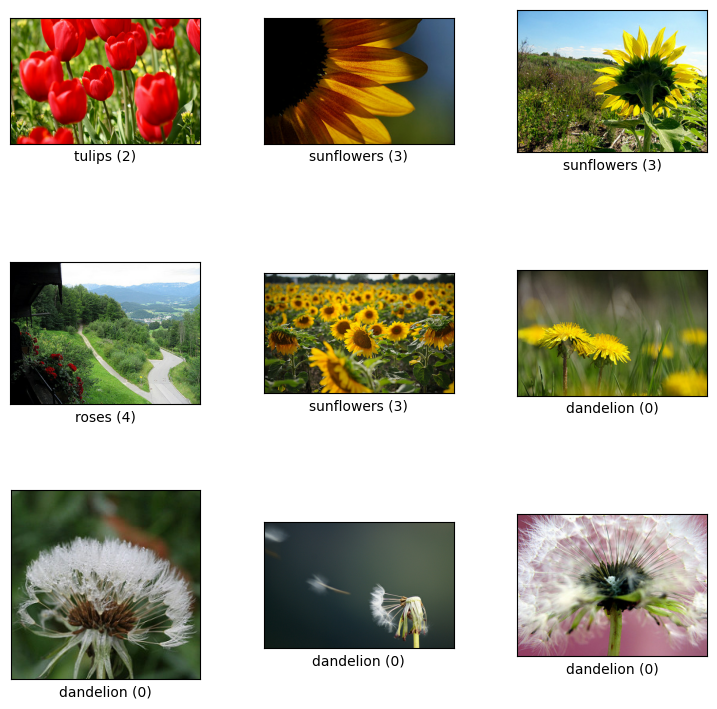

In [4]:
fig = tfds.show_examples(train_ds, metadata)


In [5]:
# Defining a few hyperparameters
IMG_SIZE = 150
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE


# We can define the Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

# A function that resizes, rescales, batches and shuffles
def prepare_images(ds, shuffle=False,):
  
  # Resize and rescale the dataset.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  # Shuffles the dataset
  if shuffle:
    ds = ds.shuffle(1000)
  
  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

## Let us resize and rescale the images in our dataset
train_ds = prepare_images(train_ds)
val_ds = prepare_images(val_ds)
test_ds = prepare_images(test_ds)

2025-07-07 21:43:32.297969: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-07-07 21:43:32.388188: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


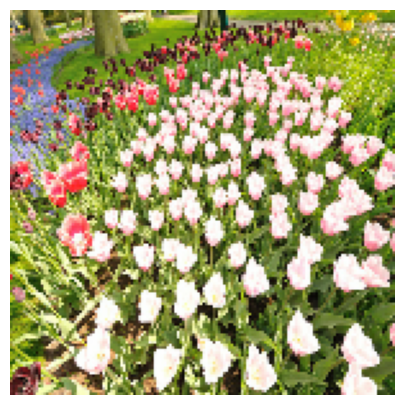

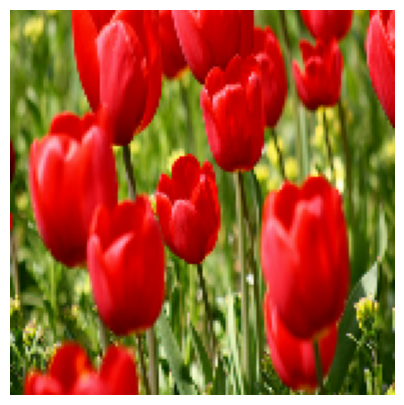

In [6]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(2):
    plt.imshow(images[0])
    # plt.title(metadata.features['label'].int2str(labels[0]))
    plt.axis("off")

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
    plt.imshow(images[0])
    # plt.title(metadata.features['label'].int2str(labels[0]))
    plt.axis("off")

2025-07-07 21:43:33.847207: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


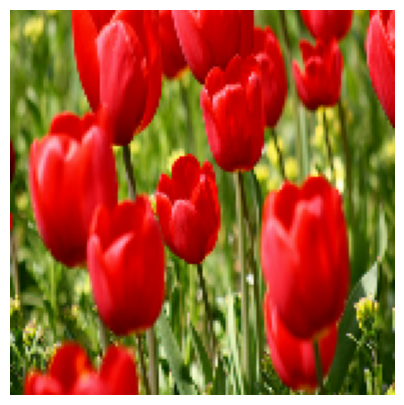

In [7]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
    plt.imshow(images[0])
    # plt.imshow(images[1])
    
    # plt.title(metadata.features['label'].int2str(labels[0]))
    plt.axis("off")

2025-07-07 21:43:38.327413: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


TypeError: Invalid shape (32, 150, 150, 3) for image data

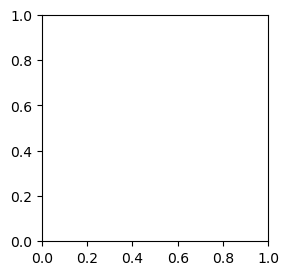

In [8]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")